<a href="https://colab.research.google.com/github/ZoeKim42/working-progress/blob/main/4_%ED%8E%AD%EA%B7%84_%EC%A2%85%EC%9D%84_%EB%B6%84%EB%A5%98%ED%95%A0_%EC%88%98_%EC%9E%88%EB%8A%94_%EB%B0%A9%EB%B2%95%EC%9D%80_%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4-펭귄 종을 분류할 수 있는 방법은 무엇일까**

#### **데이터 준비 : 데이터셋 수집**

남극 팔머 기지 펭귄 데이터(adelie, gentoo, chinstrap)

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv

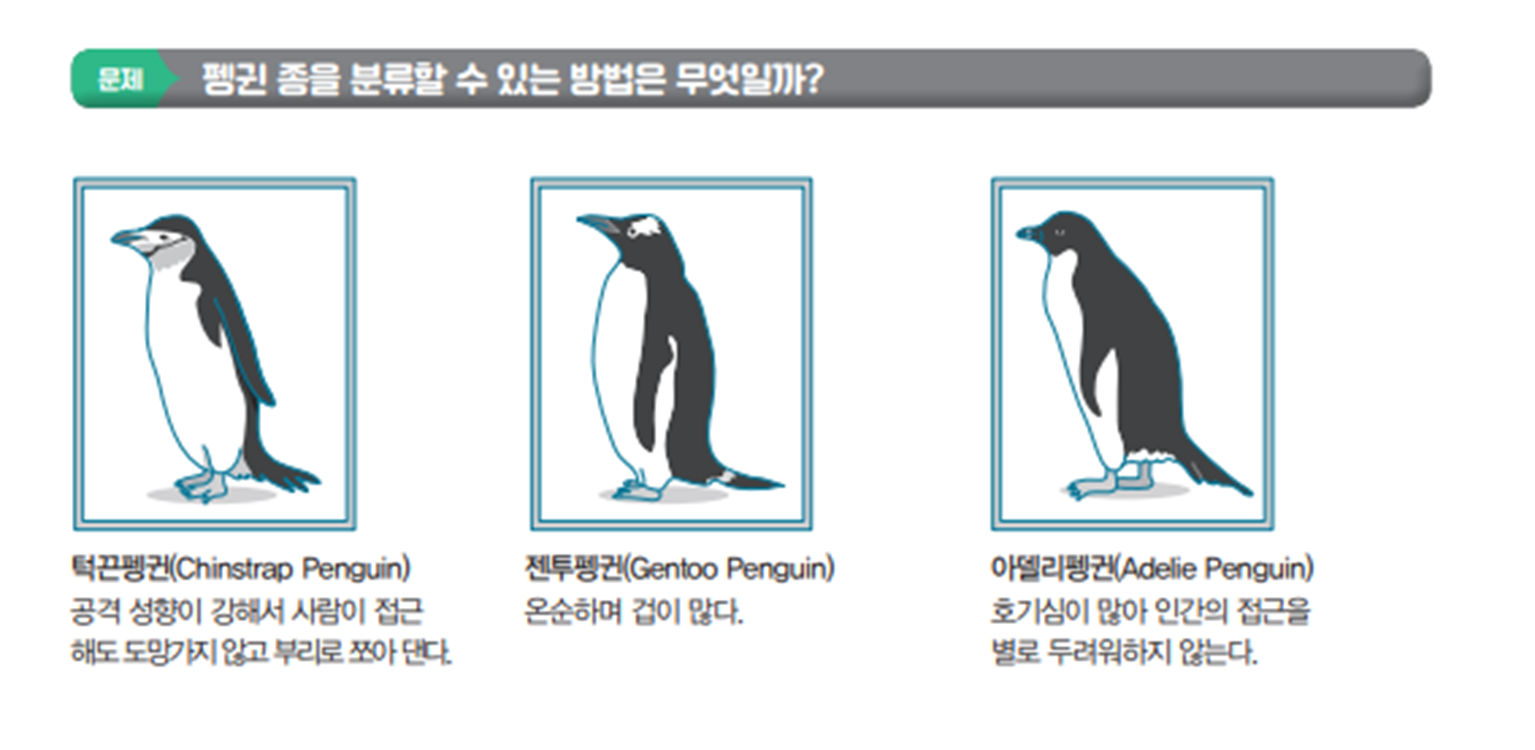

## **[1] 데이터 불러오기**

1.1 파일 업로드하기

In [1]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


1.2 데이터프레임 생성하기

In [2]:
import pandas as pd
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## **[2] 탐색적 데이터 분석 및 전처리하기**

2.1 전체적인 데이터 살펴보기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB



2.2 결측치 처리하기

In [4]:
df.isnull().sum() #sex, body_mass_g

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [5]:
df.dropna(inplace=True) #원본 데이터프레임(df)을 직접 수정
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


2.3 펭귄 성별 빈도수 구하기

In [6]:
# unique() 함수는 특정 열에 존재하는 고유한(중복되지 않는) 값들을 보여줌
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

2.4 펭귄 성별 중 잘못된 값 삭제하기

In [7]:
# 데이터프레임에서 'sex' 열의 값이 '.'인 행을 찾습니다. 이를 '불리언 인덱싱'이라고 함.
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
# 데이터프레임 336 인덱스 행 삭제하기 (axis=0 : 행, inplace=True : 원본에서 바로 바꾸기)
df.drop(axis=0, inplace=True, index=336)

In [9]:
# 데이터프레임 요약정보 구하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


2.5 펭귄 종별 개수 구하기

In [10]:
df['species'].value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


/tmp/ipython-input-1683964686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette="viridis")


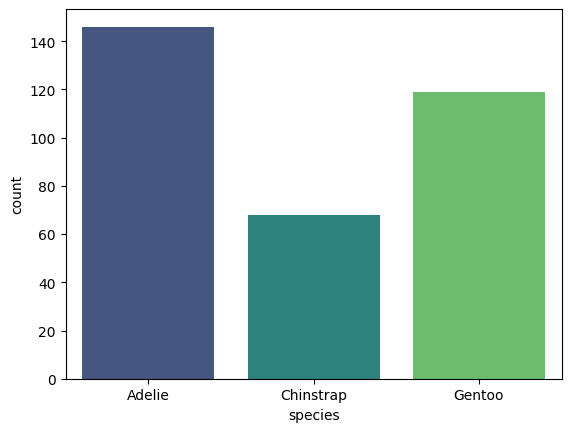

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='species', data=df, palette="viridis")
#막대별 다른 색상 적용하고 싶다면, palette="viridis","pastel","bright")
#https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

2.6 펭귄 종별 날개 길이(flipper_length_mm)를 박스플롯으로 시각화하기

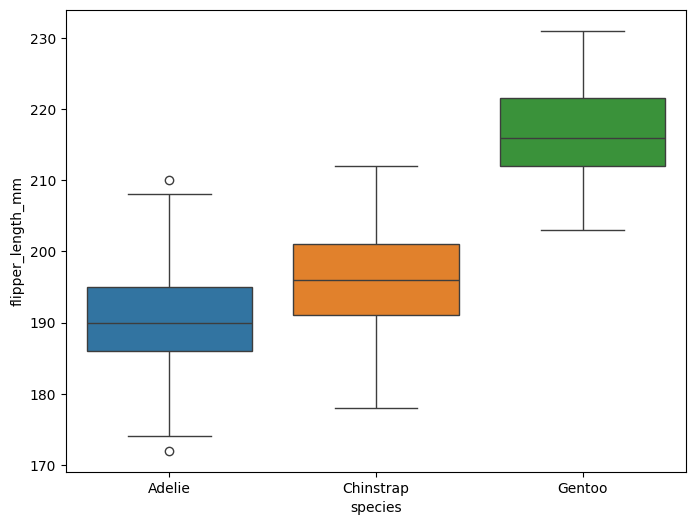

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot( x='species', y='flipper_length_mm', hue='species', data=df)
plt.show()

#### 시각화 해석
분석: Gentoo 종이 다른 두 종에 비해 날개 길이가 확연히 긴 것을 볼 수 있습니다. 이는 flipper_length_mm가 종을 분류하는 데 매우 중요한 특징임을 시사합니다.

2.7 특징값을 산점도로 시각화하기

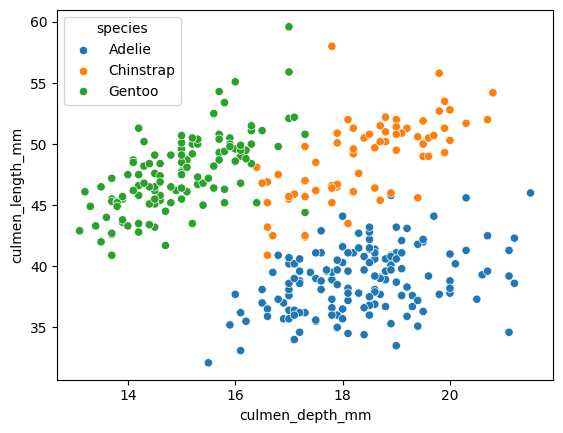

In [13]:
sns.scatterplot(x='culmen_depth_mm', y='culmen_length_mm', hue='species', data=df)
plt.show()

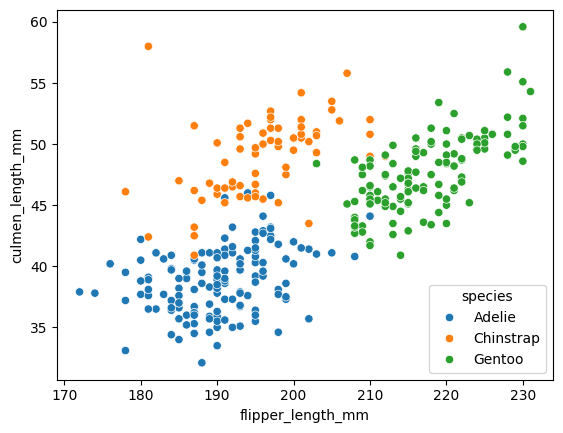

In [14]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='species', data=df)
plt.show()

#### 산점도 해석
분석: 산점도를 통해 각 펭귄 종들이 특정 데이터 영역에 군집을 이루고 있음을 확인할 수 있습니다. 이는 이 특징들을 사용하면 머신러닝 모델이 펭귄의 종을 성공적으로 분류할 수 있음을 의미합니다.

2.8 특징(feature)과 타겟(target) 선정하기

In [15]:
df1 = df[['culmen_depth_mm', 'culmen_length_mm', 'flipper_length_mm', 'species']]
df1.head()

,culmen_depth_mm,culmen_length_mm,flipper_length_mm,species
0,18.7,39.1,181.0,Adelie
1,17.4,39.5,186.0,Adelie
2,18.0,40.3,195.0,Adelie
4,19.3,36.7,193.0,Adelie
5,20.6,39.3,190.0,Adelie


In [16]:
dataset = df1.values
X = dataset[:, :-1]
y = dataset[:, -1]

In [17]:
print("특징 모양 : ", X.shape)
print("타겟 모양 : ", y.shape)

특징 모양 :  (333, 3)
타겟 모양 :  (333,)


2.9 데이터 정규화하기

In [18]:
#모델이 데이터의 크기가 아닌 데이터가 가진 고유한 패턴에 집중하여 공정하게 학습
from sklearn.preprocessing import MinMaxScaler #0~1 사이의 값으로 변경
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([0.66666667, 0.25454545, 0.15254237])

2.10 훈련 데이터, 테스트 데이터 분할하기

In [19]:
# 훈련, 테스트 데이터셋 구분하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                    stratify=y, random_state=0)

In [20]:
print("훈련 데이터 : ", X_train.shape, y_train.shape)
print("테스트 데이터 : ", X_test.shape, y_test.shape)

훈련 데이터 :  (233, 3) (233,)
테스트 데이터 :  (100, 3) (100,)


In [21]:
print(X_train[0], y_train[0])

[0.01190476 0.50909091 0.66101695] Gentoo


In [22]:
y_train[:10]

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

## **[3] 모델 생성하기**

3.1 최근접 이웃 알고리즘으로 학습하기

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
print("훈련 데이터를 이용한 모델 분류 정확도 : ", knn.score(X_train, y_train))

훈련 데이터를 이용한 모델 분류 정확도 :  0.9828326180257511


## **[4] 모델 평가 및 예측하기**

4.1 모델 평가하기

In [25]:
print("테스트 데이터를 이용한 모델 성능 평가 : ", knn.score(X_test, y_test))

테스트 데이터를 이용한 모델 성능 평가 :  0.97


4.2 최적의 k 구하기

In [26]:
for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print('k: %2d, accuracy: %.2f' % (k, score*100))

k:  2, accuracy: 95.00
k:  3, accuracy: 96.00
k:  4, accuracy: 96.00
k:  5, accuracy: 97.00
k:  6, accuracy: 96.00
k:  7, accuracy: 97.00
k:  8, accuracy: 97.00
k:  9, accuracy: 97.00
k: 10, accuracy: 97.00


4.3 테스트 데이터 예측하기

In [27]:
predictions = knn.predict(X_test)

In [28]:
print(predictions[:5])
print(y_test[:5])

['Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie']
['Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie']


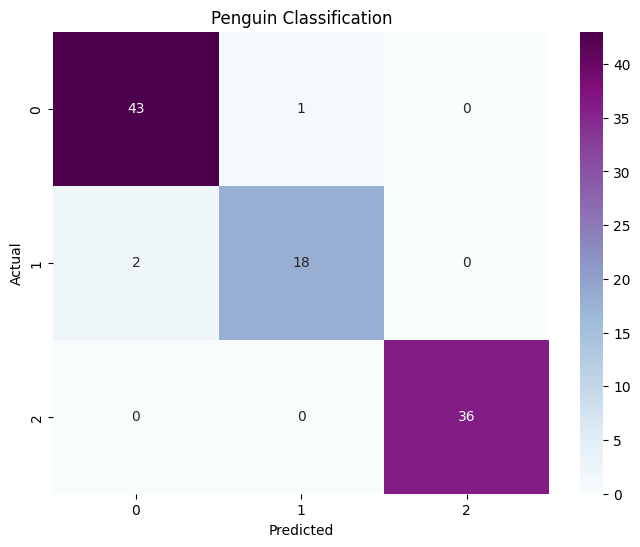

In [29]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))

conf = confusion_matrix(y_test, predictions)
sns.heatmap(conf, annot=True, cmap="BuPu")

plt.title("Penguin Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 분석
전체 정확도: 테스트 데이터 100개 중 97개(43 + 18 + 36)를 정확하게 예측했고, 3개를 틀렸습니다. 따라서 이 모델의 **정확도는 97%**로 매우 높습니다.
모델의 약점: 모델은 Chinstrap과 Adelie 종을 구분하는 데 약간의 어려움을 겪고 있습니다. 이는 두 종의 신체 특징이 다른 종에 비해 서로 유사할 수 있음을 시사합니다.
* 이 KNN 모델은 펭귄의 신체 특징만으로도 종을 매우 높은 정확도로 분류해내는 훌륭한 성능을 보여주고 있습니다.

## **[5] 모델 활용하기**

5.1 새로운 데이터프레임 생성하기

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

In [ ]:
df_new = pd.read_csv('/content/penguin_new.csv')
df_new.head()


5.2 데이터 정규화하기

In [ ]:
dataset_new = df_new.values
new_scaled = scaler.fit_transform(dataset_new)
new_scaled

5.3 새로운 데이터 예측하기

In [ ]:
print(knn.predict(new_scaled))

## 기억하기
 * scaler = MinMaxScaler(): 0~1 사이로 값을 변환해주는 **"변환기"**를 하나 만드는 과정입니다.
 * scaler.fit_transform(X): 이 한 줄의 코드는 내부적으로 두 가지 작업을 동시에 수행합니다.
 * fit() (학습 단계): X 데이터의 각 열을 쭉 훑어보면서 최소값(min)과 최대값(max)이 각각 무엇인지 찾아 기억합니다. (예: 날개 길이 열의 최소값은 172, 최대값은 231이구나!)
 * transform() (변환 단계): 위에서 기억한 최소/최대값을 사용하여 앞서 설명한 공식에 따라 X 데이터의 모든 값을 0과 1 사이로 실제로 변환합니다.

## 핵심 요약
* MinMaxScaler는 모든 특징 데이터의 범위를 0과 1 사이로 맞춰주는 정규화 도구입니다.
* 데이터 단위(Scale) 차이로 인해 모델이 특정 특징을 편애하는 현상을 막아 공정한 학습을 가능하게 합니다.
KNN과 같이 거리를 측정하는 알고리즘에 특히 효과적입니다.
**fit_transform()**은 훈련 데이터에 사용하고, 나중에 새로운 테스트 데이터에는 **transform()**만 사용해야 일관된 기준으로 변환할 수 있습니다.
